# I. Intro & Problem Understanding

### Assignment Machine Learning

| Nama          | NIM |
|---------------|-----|
| Muhammad Iqbal Saputra | 2702390236 |
| Radit Arya Pradipta    | 2802446705 |
| Muhammad Reza Alghifari| 2802555044 |

Dataset diambil dari website Computer Sciences University of California Irvine [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)


Objective dari dataset ini adalah untuk memprediksi apakah nasabah akan gagal membayar tagihan kartu kreditnya atau tidak. Data asli tsb berasal dari sebuah bank besar di Taiwan yg mana dikumpulkan Yeh & Lien (2009) untuk diteliti

| Kolom                         | Deskripsi                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| `ID`                         | ID unik untuk masing-masing klien (tidak berpengaruh dalam prediksi).     |
| `LIMIT_BAL`                  | Total jumlah kredit yang diberikan kepada klien (limit kartu kredit).     |
| `SEX`                        | Jenis kelamin (1 = laki-laki, 2 = perempuan).                             |
| `EDUCATION`                  | Tingkat pendidikan (1 = pascasarjana, 2 = sarjana, 3 = SMA, 4 = lainnya). |
| `MARRIAGE`                   | Status pernikahan (1 = menikah, 2 = lajang, 3 = lainnya).                |
| `AGE`                        | Usia klien (dalam tahun).                                                 |
| `PAY_0`                      | Status pembayaran bulan September 2005 (0 = tepat waktu, -1 = bayar penuh, 1 = menunggak 1 bulan, dst). |
| `PAY_2`                      | Status pembayaran bulan Agustus 2005 (sama seperti PAY_0).                |
| `PAY_3`                      | Status pembayaran bulan Juli 2005.                                        |
| `PAY_4`                      | Status pembayaran bulan Juni 2005.                                        |
| `PAY_5`                      | Status pembayaran bulan Mei 2005.                                         |
| `PAY_6`                      | Status pembayaran bulan April 2005.                                       |
| `BILL_AMT1`                  | Jumlah tagihan pada bulan September 2005.                                 |
| `BILL_AMT2`                  | Jumlah tagihan pada bulan Agustus 2005.                                   |
| `BILL_AMT3`                  | Jumlah tagihan pada bulan Juli 2005.                                      |
| `BILL_AMT4`                  | Jumlah tagihan pada bulan Juni 2005.                                      |
| `BILL_AMT5`                  | Jumlah tagihan pada bulan Mei 2005.                                       |
| `BILL_AMT6`                  | Jumlah tagihan pada bulan April 2005.                                     |
| `PAY_AMT1`                   | Jumlah pembayaran pada bulan September 2005.                              |
| `PAY_AMT2`                   | Jumlah pembayaran pada bulan Agustus 2005.                                |
| `PAY_AMT3`                   | Jumlah pembayaran pada bulan Juli 2005.                                   |
| `PAY_AMT4`                   | Jumlah pembayaran pada bulan Juni 2005.                                   |
| `PAY_AMT5`                   | Jumlah pembayaran pada bulan Mei 2005.                                    |
| `PAY_AMT6`                   | Jumlah pembayaran pada bulan April 2005.                                  |
| `default payment next month` | Target label: Apakah klien gagal bayar di bulan berikutnya? (1 = ya, 0 = tidak). |


# II. Data Collection & Loading

In [190]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries untuk mengabaikan semua warning
import warnings
warnings.filterwarnings('ignore')

# Libraries untuk mengatur tampilan plot
import time
start_time = time.time()

In [191]:
# Loading data
df = pd.read_excel('default_of_credit_card_clients.xlsx', header=1)
df.drop(columns=['ID'], inplace=True)

In [192]:
# Cek 5 data teratas
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [193]:
# Cek 5 data terbawah
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [194]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

- Terdapat total ```30000 entry(row) data dengan 24 kolom data```  

- hanya 1 tipe data yang digunakan yaitu integer   

- Tidak Terdapat ```null values dalam data```  

# III. Data Cleaning (Pre-processing)

In [195]:
# Cek bentuk data
print(f'Bentuk data: {df.shape}')
df.columns.tolist()

Bentuk data: (30000, 24)


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [196]:
# Cek missing value
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

*Data bersih dari missing value*

In [197]:
# Cek data duplikat
df.duplicated().sum()

35

*Terdapat 35 row data yang sama*

In [198]:
# Drop data duplikat
df.drop_duplicates(inplace=True)
print(f'Bentuk data setelah di drop: {df.shape}')

Bentuk data setelah di drop: (29965, 24)


In [199]:
# Define numerical dan categorical columns
numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_colunms = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# IV. Exploratory Data Analysis (EDA)

## IV.a Statistic Descriptive

In [200]:
# Cek deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


📊 Descriptive Statistics Summary

1. Umum
- Jumlah data: **29.965 baris**
- Tidak ada missing values

---

1. Fitur Demografi

| Kolom       | Mean / Median | Insight                                                                 |
|-------------|----------------|-------------------------------------------------------------------------|
| `SEX`       | Mean = 1.60    | Mayoritas klien adalah **perempuan** (kode 2)                           |
| `EDUCATION` | Mean = 1.85    | Mayoritas klien adalah **lulusan sarjana/SMA**                          |
| `MARRIAGE`  | Mean = 1.55    | Mayoritas klien **menikah atau lajang**                                 |
| `AGE`       | Mean = 35.49   | Usia klien berkisar antara **21–79 tahun**, median = 34                 |

---

3. Fitur Finansial

| Kolom         | Mean          | Std Dev        | Max         | Insight                                                                 |
|---------------|---------------|----------------|-------------|-------------------------------------------------------------------------|
| `LIMIT_BAL`   | 167.442.000   | 129.760.135    | 1.000.000   | Limit kartu kredit sangat bervariasi, banyak outlier                    |
| `BILL_AMT1-6` | ~38–51 juta   | 59–73 juta     | Hingga 1.66M| Ada klien dengan tagihan sangat tinggi (indikasi high spenders/outlier) |
| `PAY_AMT1-6`  | ~4.800–5.900  | 15–23 juta     | Hingga 1.68M| Nilai pembayaran juga menunjukkan ketimpangan besar                     |

---

4. Histori Pembayaran (PAY_0 to PAY_6)

| Kolom  | Min | Median | Max | Insight                                                                 |
|--------|-----|--------|-----|-------------------------------------------------------------------------|
| `PAY_X`| -2  | -1     | 8   | Nilai -1 artinya pembayaran tepat waktu, nilai 0 artinya minimum paid, >0 = tunggakan. Nilai ekstrem (8) menandakan keterlambatan parah |

---

5. Target: `default payment next month`
- Mean = **0.221**
- Artinya: hanya **22,1%** dari klien yang gagal bayar (label = 1)
- Dataset **imbalanced** → perlu strategi seperti resampling saat modeling

---

1. Outlier Detection
- Kolom `LIMIT_BAL`, `BILL_AMTx`, `PAY_AMTx` menunjukkan nilai maksimum yang jauh dari Q3 dan deviasi standar besar
- Potensi **outlier ekstrim** sangat tinggi dan **perlu dihandle** saat preprocessing

---

🧠 Kesimpulan
- Dataset bersih dan lengkap (tanpa missing value)
- Distribusi data **cukup skewed dan mengandung banyak outlier**
- Target klasifikasi **imbalanced**
- Diperlukan langkah preprocessing ekstra seperti normalisasi, outlier removal, dan handling imbalance sebelum membuat model



## IV.b Data Skewness and Kurtosis

In [201]:
# Cek skewness & kurtosis data
skewness = df.skew()
kurtosis = df.kurtosis()
stats_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})
stats_df

,skewness,kurtosis
LIMIT_BAL,0.993491,0.537587
SEX,-0.424202,-1.820174
EDUCATION,0.970709,2.079207
MARRIAGE,-0.018591,-1.362806
AGE,0.732056,0.043988
PAY_0,0.734606,2.730038
PAY_2,0.792070,1.577609
PAY_3,0.841464,2.091666
PAY_4,1.000799,3.508962
PAY_5,1.009329,4.003562


📊 Summary Skewness dan Kurtosis

- **Skewness**
  - Skewness > 0 → data condong ke kanan (right-skewed)
  - Skewness -0.5 ≤ x ≤ 0.5 normal
  - Skewness < 0 → data condong ke kiri (left-skewed)
- **Kurtosis**
  - Normal kurtosis ≈ 3
  - Kurtosis > 3 → distribusi tajam, banyak outlier (leptokurtic)
  - Kurtosis < 3 → distribusi datar (platykurtic)

---

📈 Kolom dengan Skewness Tinggi (Right-Skewed)
Kolom berikut memiliki skewness **jauh di atas 1**, artinya data sangat condong ke kanan dan outlier besar kemungkinan terjadi:

| Kolom        | Skewness | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 30.44    | Distribusi pembayaran bulan kedua sangat tidak normal               |
| PAY_AMT3     | 17.21    | Ada beberapa nilai ekstrim tinggi                                   |
| PAY_AMT1     | 14.66    | Mayoritas bayar kecil, sedikit yang bayar besar                     |
| PAY_AMT4-6   | 10–13    | Pola serupa, outlier kuat                                            |
| BILL_AMT1-6  | 2.6–3.1  | Tagihan bulanan sangat bervariasi dan skewed ke kanan               |
| PAY_4-6      | ≈1.0     | Ada keterlambatan ekstrim dari sebagian kecil klien                 |
| LIMIT_BAL    | 0.99     | Sebagian kecil klien punya limit sangat tinggi                      |

---

📊 Kolom dengan Kurtosis Tinggi (Tajam & Outlier Besar)
Kolom berikut memiliki kurtosis jauh lebih tinggi dari 3, artinya sangat tajam dan mengandung outlier ekstrem:

| Kolom        | Kurtosis | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 1639.92  | Outlier sangat ekstrim                                               |
| PAY_AMT3     | 563.74   | Banyak nilai ekstrim di distribusi                                  |
| PAY_AMT1     | 414.85   | Sebagian kecil klien bayar sangat besar                             |
| PAY_AMT4-6   | 166–277  | Masih sangat tajam dan tidak normal                                  |
| BILL_AMT3    | 19.77    | Ada tagihan sangat besar yang mendistorsi distribusi                |
| BILL_AMT1-6  | 9.8–12.2 | Semua tagihan bulanan menunjukkan outlier                           |
| PAY_4-6      | 3.4–4.0  | Pembayaran tertunda ekstrim                                          |

---

⚖️ Kolom yang Hampir Simetris & Normal
| Kolom        | Skewness | Kurtosis | Insight                                      |
|--------------|----------|----------|----------------------------------------------|
| AGE          | 0.73     | ≈0.04    | Hampir normal, sedikit skew ke kanan         |
| EDUCATION    | 0.97     | 2.08     | Agak skewed tapi masih bisa ditoleransi      |
| default_payment | 1.34  | ≈ -0.20  | Target label agak skewed, tapi kurtosis rendah|

---

🔍 Catatan Penting
- **PAY_AMT** & **BILL_AMT** kolom sangat skewed dan leptokurtic → **perlu transformasi** (contoh: log transform) sebelum modeling.
- Data **tidak normal**, jadi algoritma yang mengasumsikan normalitas (seperti Linear Regression) mungkin kurang cocok tanpa preprocessing.
- Perlu juga pertimbangkan **robust scaler** daripada standar scaler.

---

Kesimpulan
- Kita akan menggunakan `MinMaxScaler` untuk fitur dengan skewness > 1
- Visualisasi distribusi (histogram/boxplot) untuk melihat bentuk dan outlier
- Pertimbangkan teknik sampling karena target `default_payment` juga skewed



## IV.c Distribution Visualization

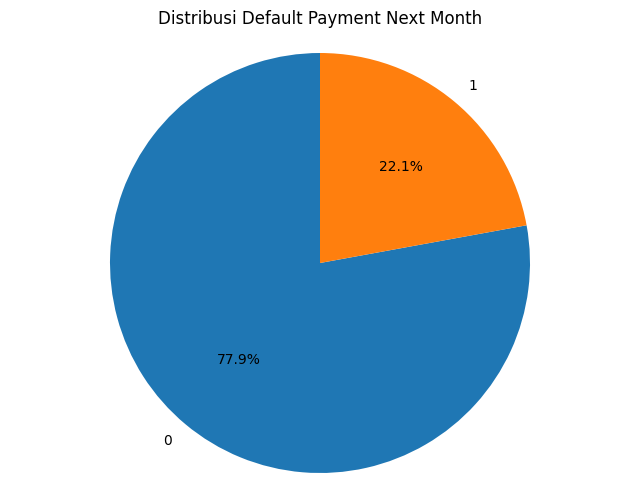

In [202]:
# Cek distribusi kolom `default payment next month`
counts = df['default payment next month'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Default Payment Next Month')
plt.axis('equal')
plt.show()

Fitur target imbalance
`1 = gagal bayar`
`0 = bayar`
Perlu dilakukan resampling agar data tidak bias ketika predict

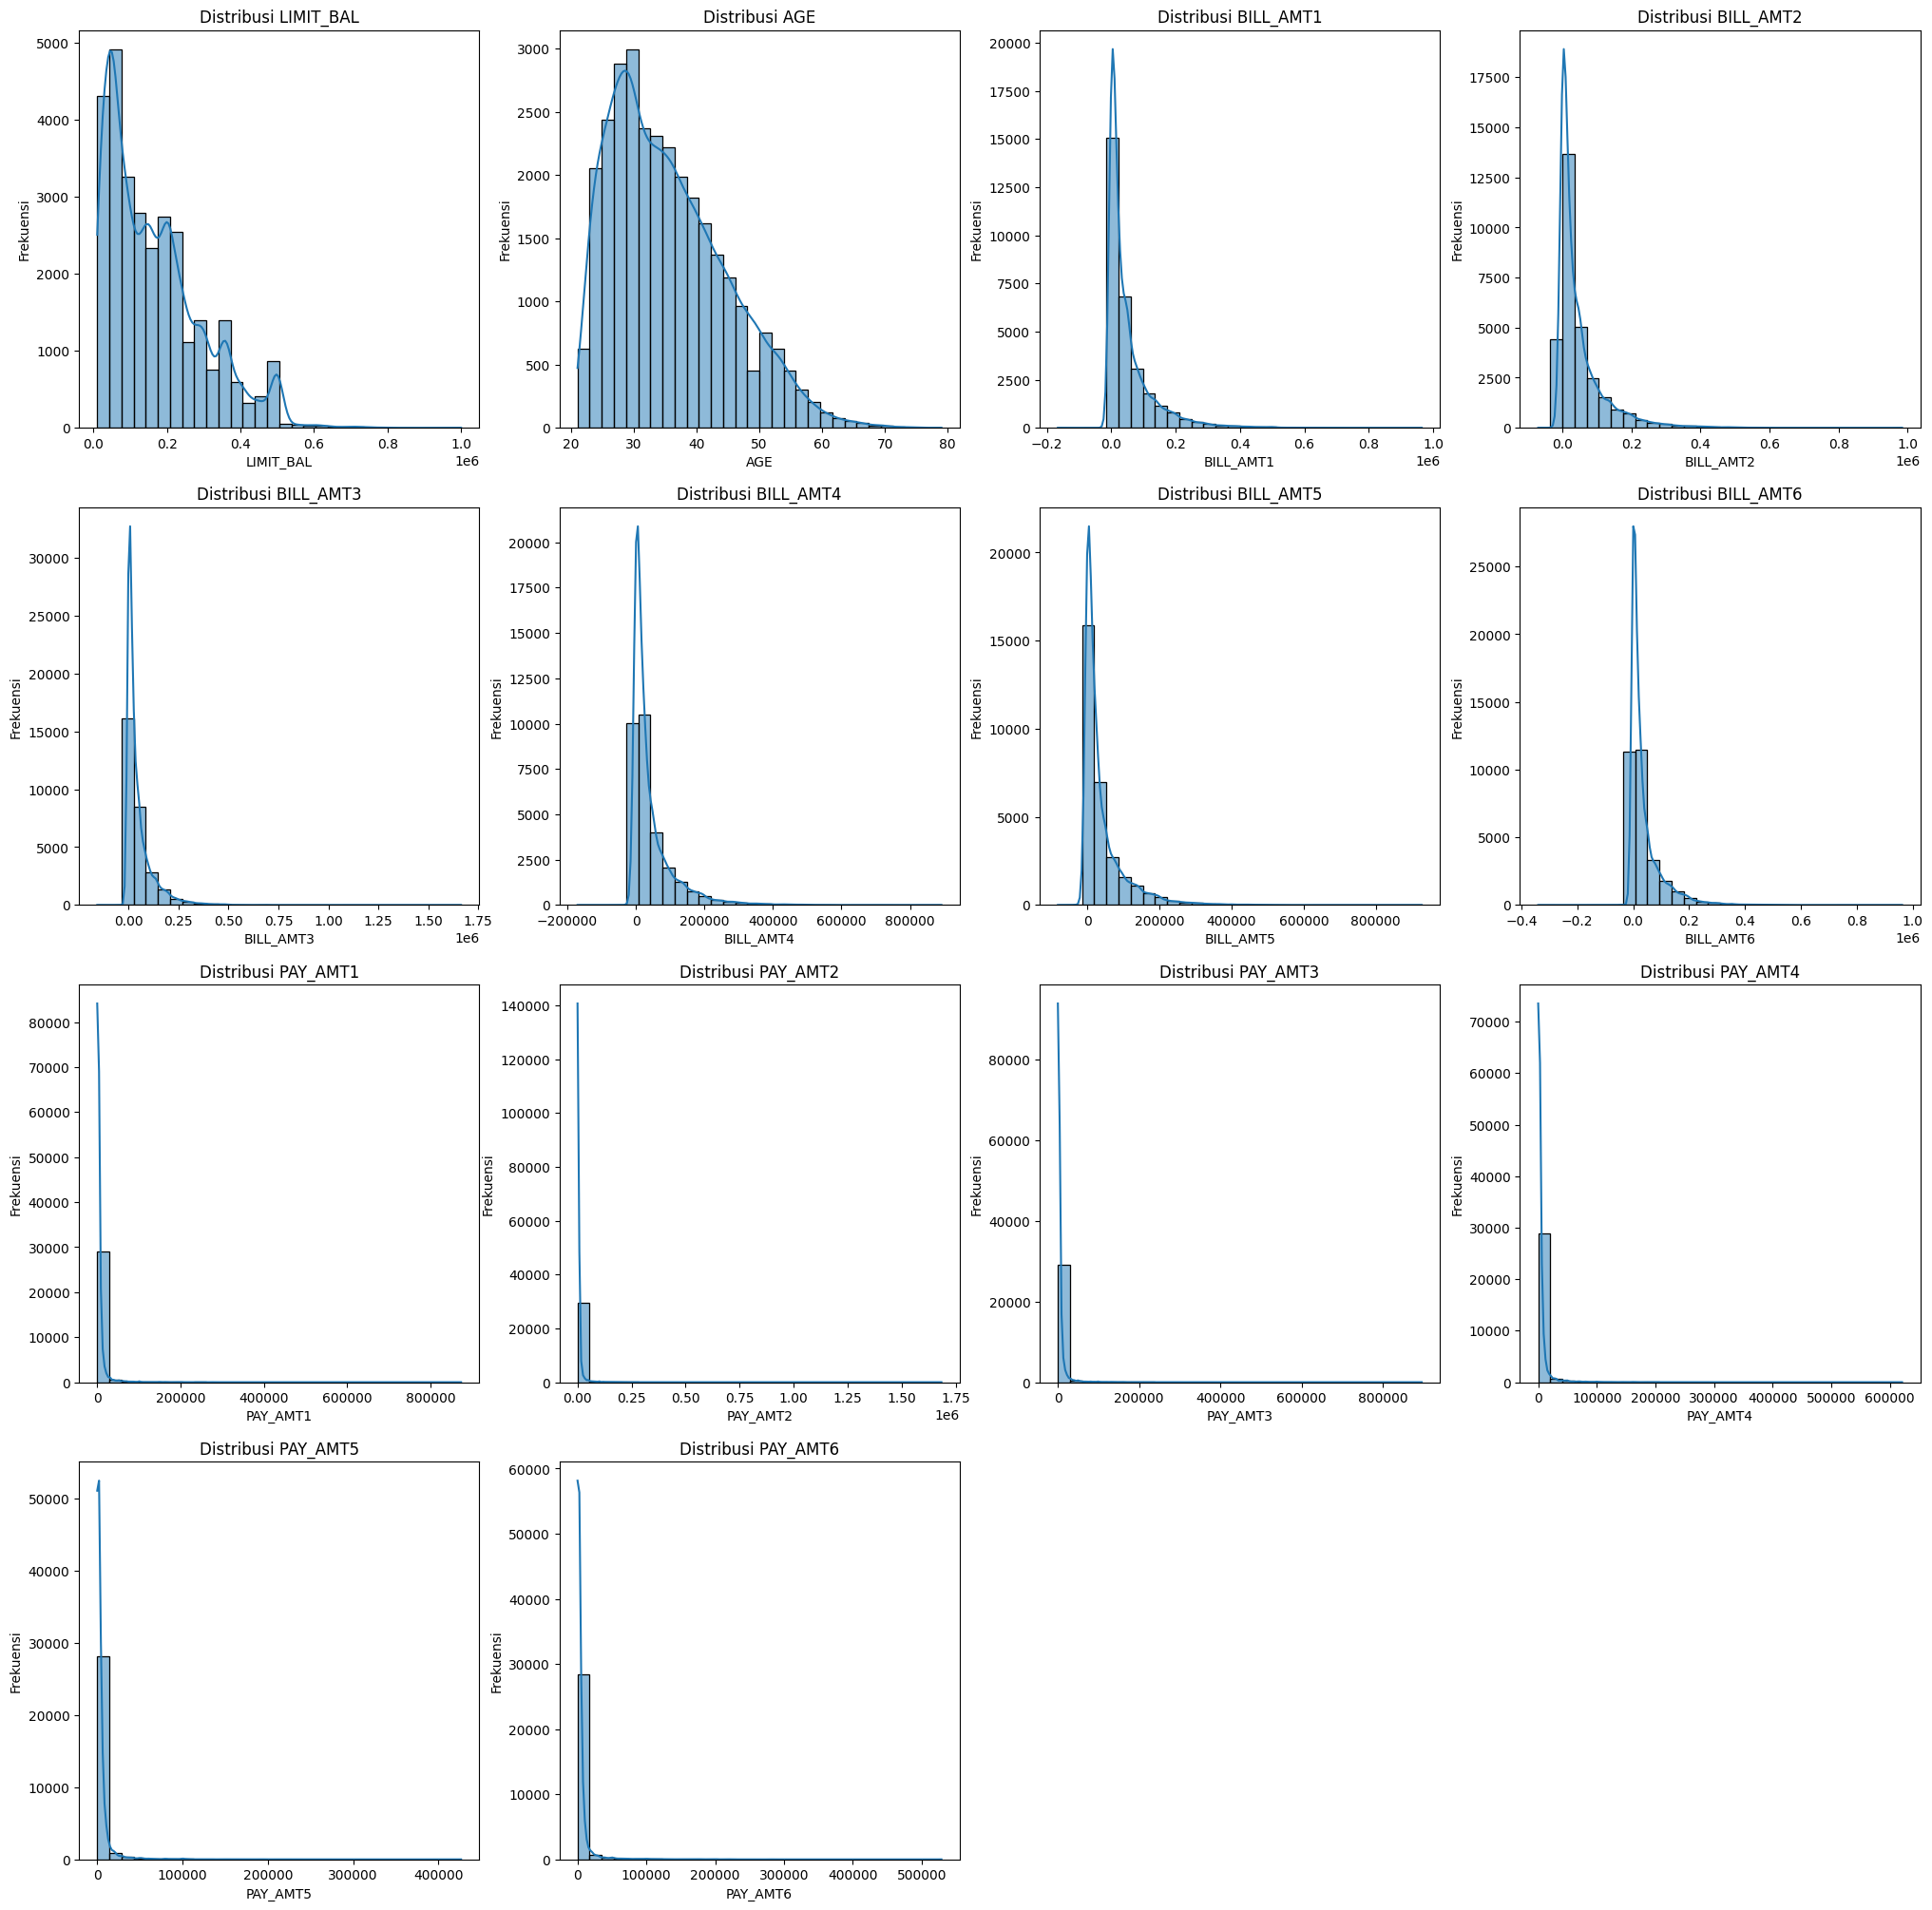

In [203]:
# Cek distribusi kolom numerik
plt.figure(figsize=(25, 25))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

📊 Insight Visual Distribusi Numerical Features

 📝 Catatan Umum
Distribusi fitur numerik dalam dataset ini umumnya **tidak normal**, ditandai dengan skewness tinggi dan outlier signifikan, terutama pada fitur keuangan seperti `BILL_AMT` dan `PAY_AMT`.

---

 🔹 LIMIT_BAL (Limit Kartu Kredit)
- **Skewness: 0.99** → moderately right-skewed
- Mayoritas nasabah memiliki limit < 200.000
- Hanya sedikit yang limitnya mendekati 1 juta
- ⚠️ Distribusi tidak normal

---

 🔹 AGE (Usia)
- **Skewness: 0.73** → moderately skewed ke kanan
- Umur terbanyak antara 30–35 tahun
- Usia minimum 21, maksimum 79
- ✅ Hampir normal

---

🔹 BILL_AMT1 hingga BILL_AMT6 (Tagihan Bulanan)

| Kolom     | Skewness | Distribusi     | Insight                                                                 |
|-----------|----------|----------------|-------------------------------------------------------------------------|
| BILL_AMT1 | 2.66     | Sangat skewed  | Banyak tagihan rendah, sedikit yang ekstrem tinggi                     |
| BILL_AMT2 | 2.70     | Sangat skewed  | Mirip dengan bulan sebelumnya                                           |
| BILL_AMT3 | 3.09     | Ekstrem skewed | Kemungkinan besar outlier memengaruhi distribusi                       |
| BILL_AMT4 | 2.82     | Sangat skewed  | Sebagian besar data menumpuk di angka rendah                           |
| BILL_AMT5 | 2.87     | Sangat skewed  | Konsisten dengan bulan lainnya                                          |
| BILL_AMT6 | 2.85     | Sangat skewed  | Beberapa nilai negatif perlu investigasi lebih lanjut                  |

- ⚠️ Tidak normal, banyak outlier
- 🧠 Distribusi ini mencerminkan mayoritas pengguna dengan tagihan rendah tapi beberapa dengan tagihan ekstrem

---

🔹 PAY_AMT1 hingga PAY_AMT6 (Pembayaran Bulanan)

| Kolom     | Skewness | Distribusi       | Insight                                                               |
|-----------|----------|------------------|-----------------------------------------------------------------------|
| PAY_AMT1  | 14.66    | Ekstrem skewed   | Banyak nilai = 0, hanya sedikit yang membayar dalam jumlah besar     |
| PAY_AMT2  | 30.44    | Ekstrem skewed   | Nilai nol mendominasi                                                |
| PAY_AMT3  | 17.21    | Ekstrem skewed   | Outlier mendominasi distribusi                                       |
| PAY_AMT4  | 12.90    | Ekstrem skewed   | Distribusi berat ke kanan, nilai besar jarang                        |
| PAY_AMT5  | 11.12    | Ekstrem skewed   | Sebagian besar data adalah non-pembayar                              |
| PAY_AMT6  | 10.63    | Ekstrem skewed   | Tren yang sama dengan bulan lain                                     |

- ⚠️ Tidak normal, sparsity tinggi
- 🧠 Mayoritas klien tidak membayar (nilai = 0), jika tidak dilakukan resampling/balancing data. model cenderung akan bias predict majority

---

🔚 Kesimpulan Umum
| Kategori Fitur | Distribusi          | Saran Sementara                                  |
|----------------|---------------------|--------------------------------------------------|
| `AGE`          | Hampir normal       | Bisa dipakai langsung untuk modeling             |
| `LIMIT_BAL`    | Skewed moderat      | Perlu penanganan outlier, scaling                |
| `BILL_AMT`     | Highly skewed       | Banyak outlier, sebaiknya distandarisasi         |
| `PAY_AMT`      | Ekstrem skewed      | Perlu perhatian khusus (outlier & sparsity)      |

> 💡 Semua fitur numerik kecuali `AGE` menunjukkan distribusi tidak normal. Perlu dihandle lebih lanjut

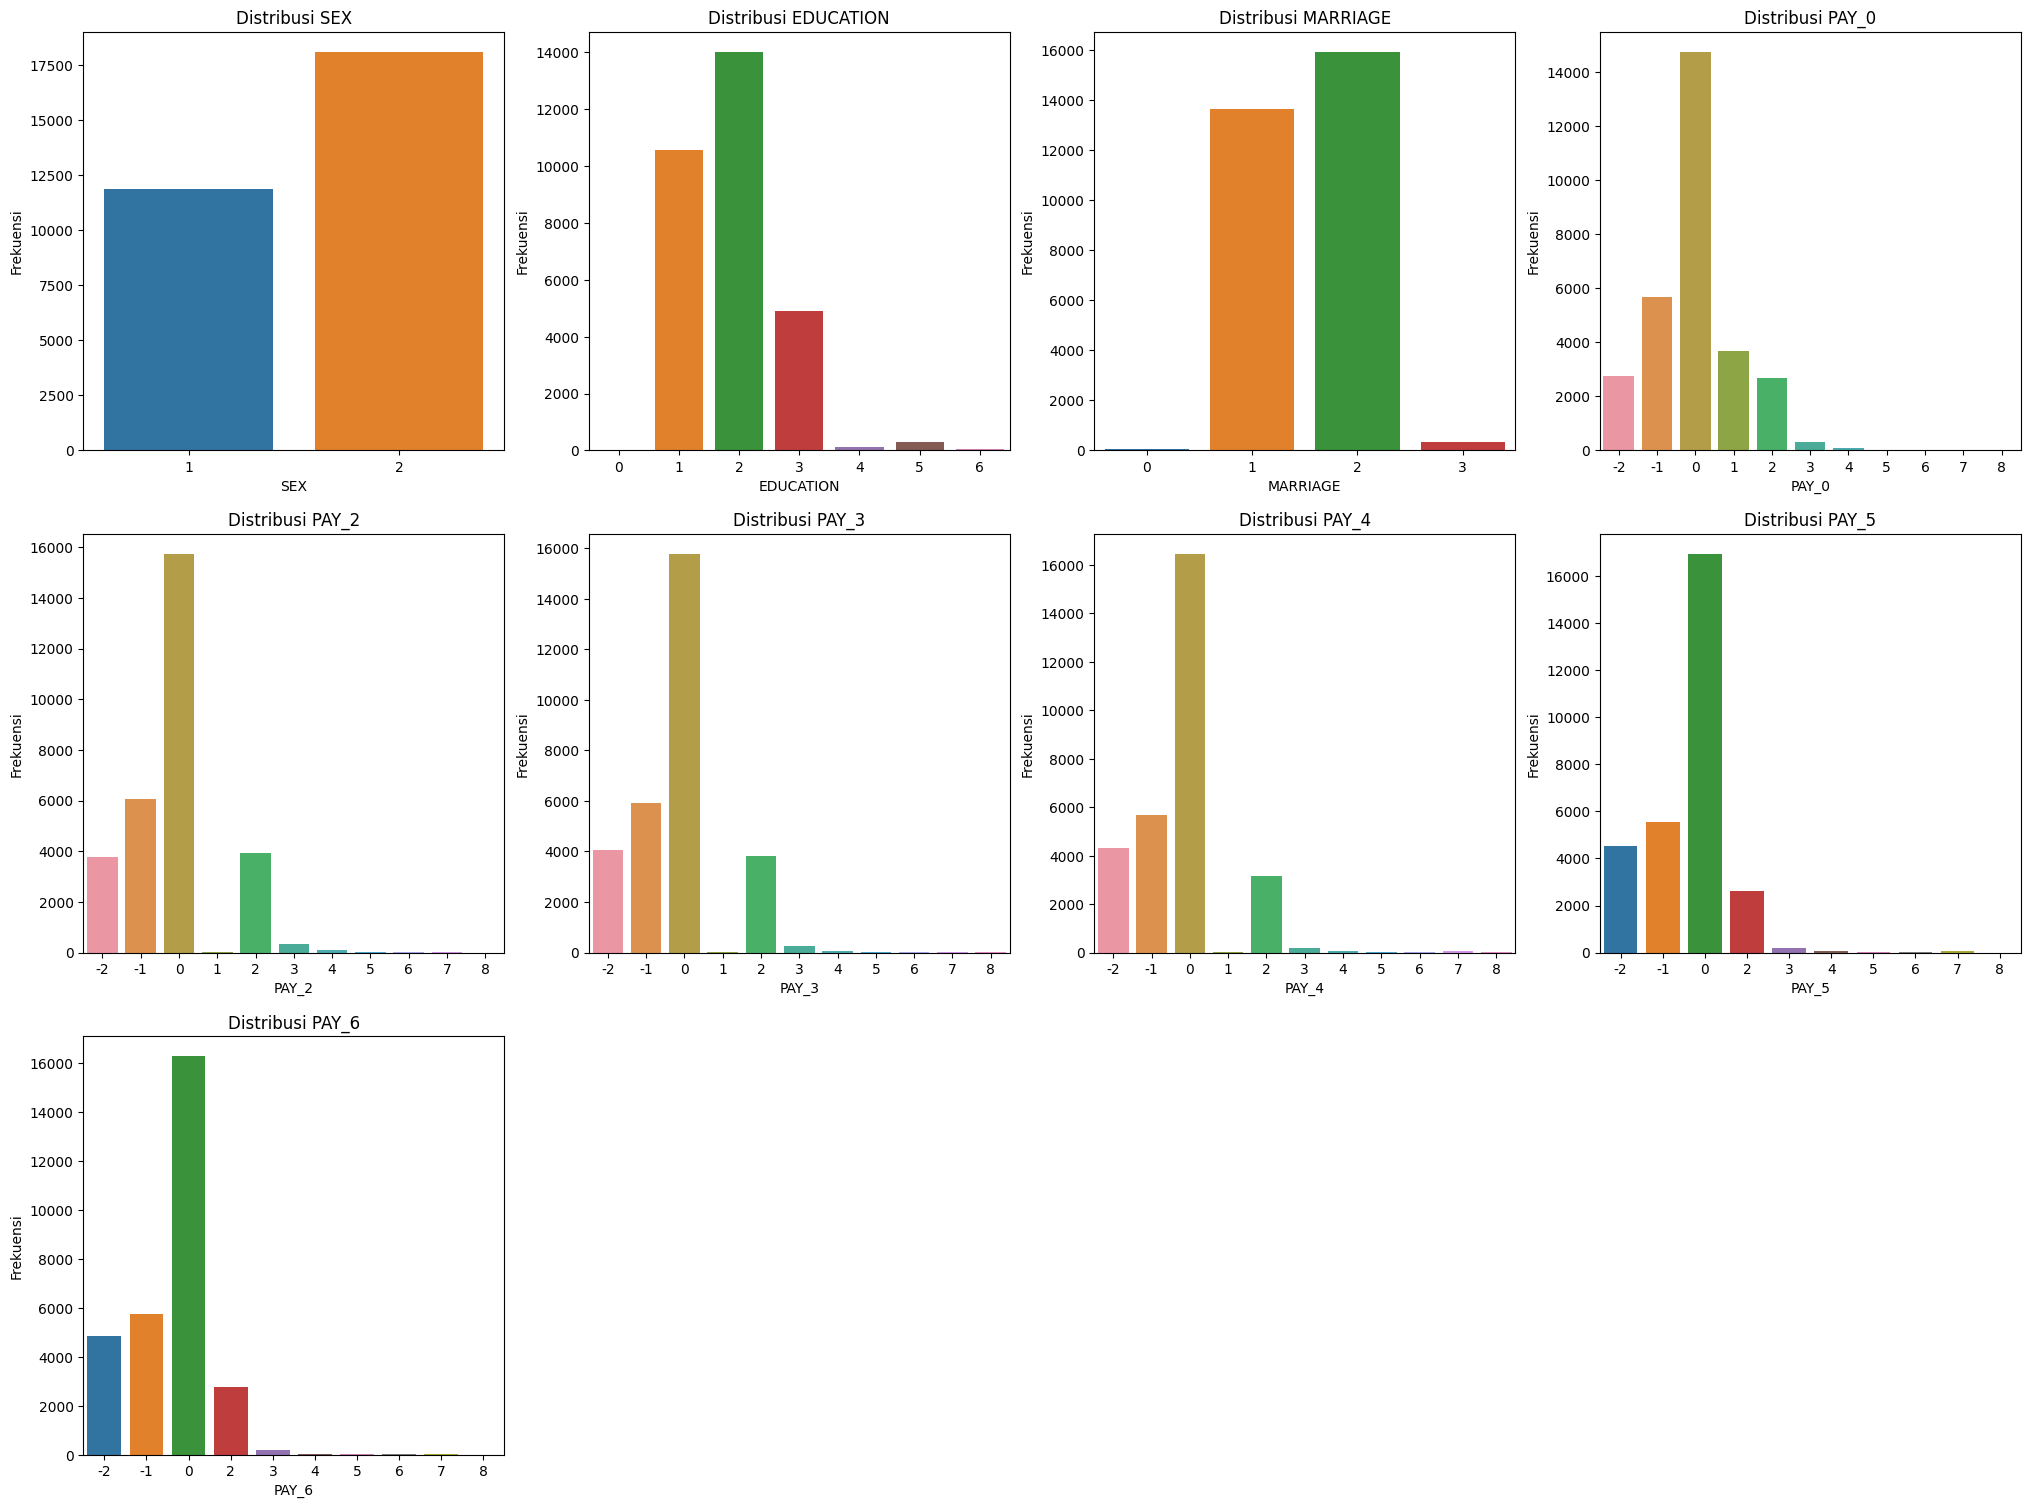

In [204]:
# Cek distribusi kolom kategorikal
plt.figure(figsize=(25, 25))
for i, col in enumerate(categorical_colunms):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

 📊 Insight Visualisasi Categorical Features

 🔹 SEX (Jenis Kelamin)
- Kategori:
  - 1 = Laki-laki
  - 2 = Perempuan
- Mayoritas nasabah adalah **perempuan**
- Perbandingan sekitar 60:40 (Perempuan:Laki-laki)

---

 🔹 EDUCATION (Tingkat Pendidikan)
- Kategori umum:
  - 1 = Pascasarjana
  - 2 = Sarjana
  - 3 = SMA
  - 4/5/6/0 = Lainnya / Tidak jelas
- Mayoritas nasabah berada di tingkat pendidikan **sarjana (2)** dan **SMA (3)**

---

 🔹 MARRIAGE (Status Pernikahan)
- Kategori:
  - 1 = Menikah
  - 2 = Lajang
  - 3 = Lainnya
- Mayoritas nasabah adalah **lajang (2)** dan **menikah (1)**
- Kategori 3 sangat sedikit

---

 🔹 PAY_0 hingga PAY_6 (Status Pembayaran Bulanan)
- Nilai -2 = tidak ada informasi, -1 = membayar tepat waktu, 0 = tidak telat, 1–8 = keterlambatan bulan
- **Mayoritas nasabah membayar tepat waktu** (`-1`) atau tidak telat (`0`) di setiap bulan
- Jumlah keterlambatan (`>=1`) makin sedikit seiring meningkatnya jumlah bulan keterlambatan
- Terlihat bahwa distribusi status keterlambatan cukup **konsisten** dari PAY_0 hingga PAY_6
- 🧠 Insight:
  - Fitur ini mencerminkan **kedisiplinan nasabah**
  - Bisa direkayasa menjadi fitur tambahan seperti "jumlah bulan menunggak" atau "pernah telat"




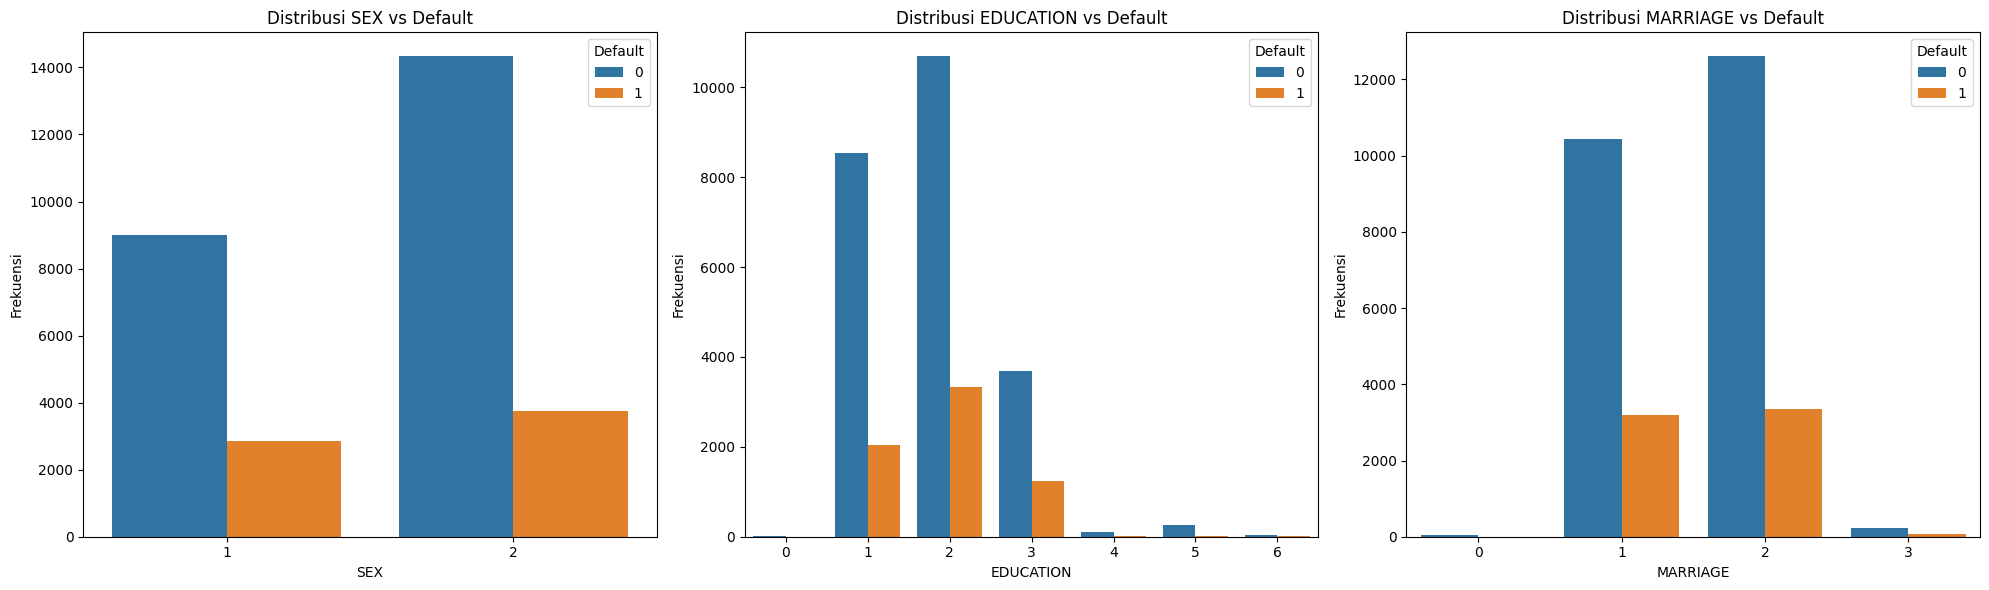

In [205]:
# Cek relationship kolom categorical dengan target
categorical_colunms_and_target = ['SEX','EDUCATION', 'MARRIAGE']
fig, axes = plt.subplots(1, len(categorical_colunms_and_target), figsize=(20, 6))

for i, col in enumerate(categorical_colunms_and_target):
    sns.countplot(x=col, hue='default payment next month', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} vs Default')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].legend(title='Default', loc='upper right')

plt.tight_layout()
plt.show()

📊 Insight Relationship between Categorical Column and Target

 🔹 1. SEX vs Default
- Kategori 1 = Laki-laki, 2 = Perempuan
- **Perempuan (2)** lebih banyak jumlahnya dibanding laki-laki
- Namun, proporsi **gagal bayar (default)** terlihat sedikit lebih tinggi pada **perempuan**
- 🧠 Insight: Jenis kelamin perempuan sedikit lebih dominan dalam populasi dan juga kontribusi **gagal bayar**

---

 🔹 2. EDUCATION vs Default
- Kategori:
  - 1 = Pascasarjana
  - 2 = Sarjana
  - 3 = SMA
  - 0, 4, 5, 6 = Tidak jelas / lainnya
- Mayoritas nasabah berada di tingkat **sarjana (2)** dan **SMA (3)**
- Jumlah default paling banyak terjadi pada pendidikan **sarjana**, tapi ini wajar karena populasi terbanyak juga dari sana
- Namun, proporsi default dari kelompok **SMA (3)** terlihat **lebih tinggi secara visual**
- 🧠 Insight: Meskipun sarjana paling banyak, kelompok SMA mungkin punya **risiko gagal bayar lebih besar secara proporsional**

---

 🔹 3. MARRIAGE vs Default
- Kategori:
  - 1 = Menikah
  - 2 = Lajang
  - 3 = Lainnya
- Jumlah nasabah paling banyak adalah yang **lajang (2)**, disusul **menikah (1)**
- Default tersebar cukup seimbang antara keduanya, meskipun terlihat **sedikit lebih tinggi pada lajang**
- Kategori 3 sangat kecil dan bisa dipertimbangkan untuk digabung sebagai "lainnya"
- 🧠 Insight: Status lajang sedikit lebih berisiko terhadap default — mungkin karena tanggungan ekonomi lebih ringan tapi disiplin finansial lebih rendah?

---

 🔚 Kesimpulan
- Semua fitur kategorikal menunjukkan bahwa **gagal bayar tidak terjadi merata**, tapi dipengaruhi oleh karakteristik demografi
- **Kelompok risiko default yang lebih tinggi (secara proporsional):**
  - Perempuan
  - Pendidikan SMA
  - Status lajang

## IV.d Outlier detection

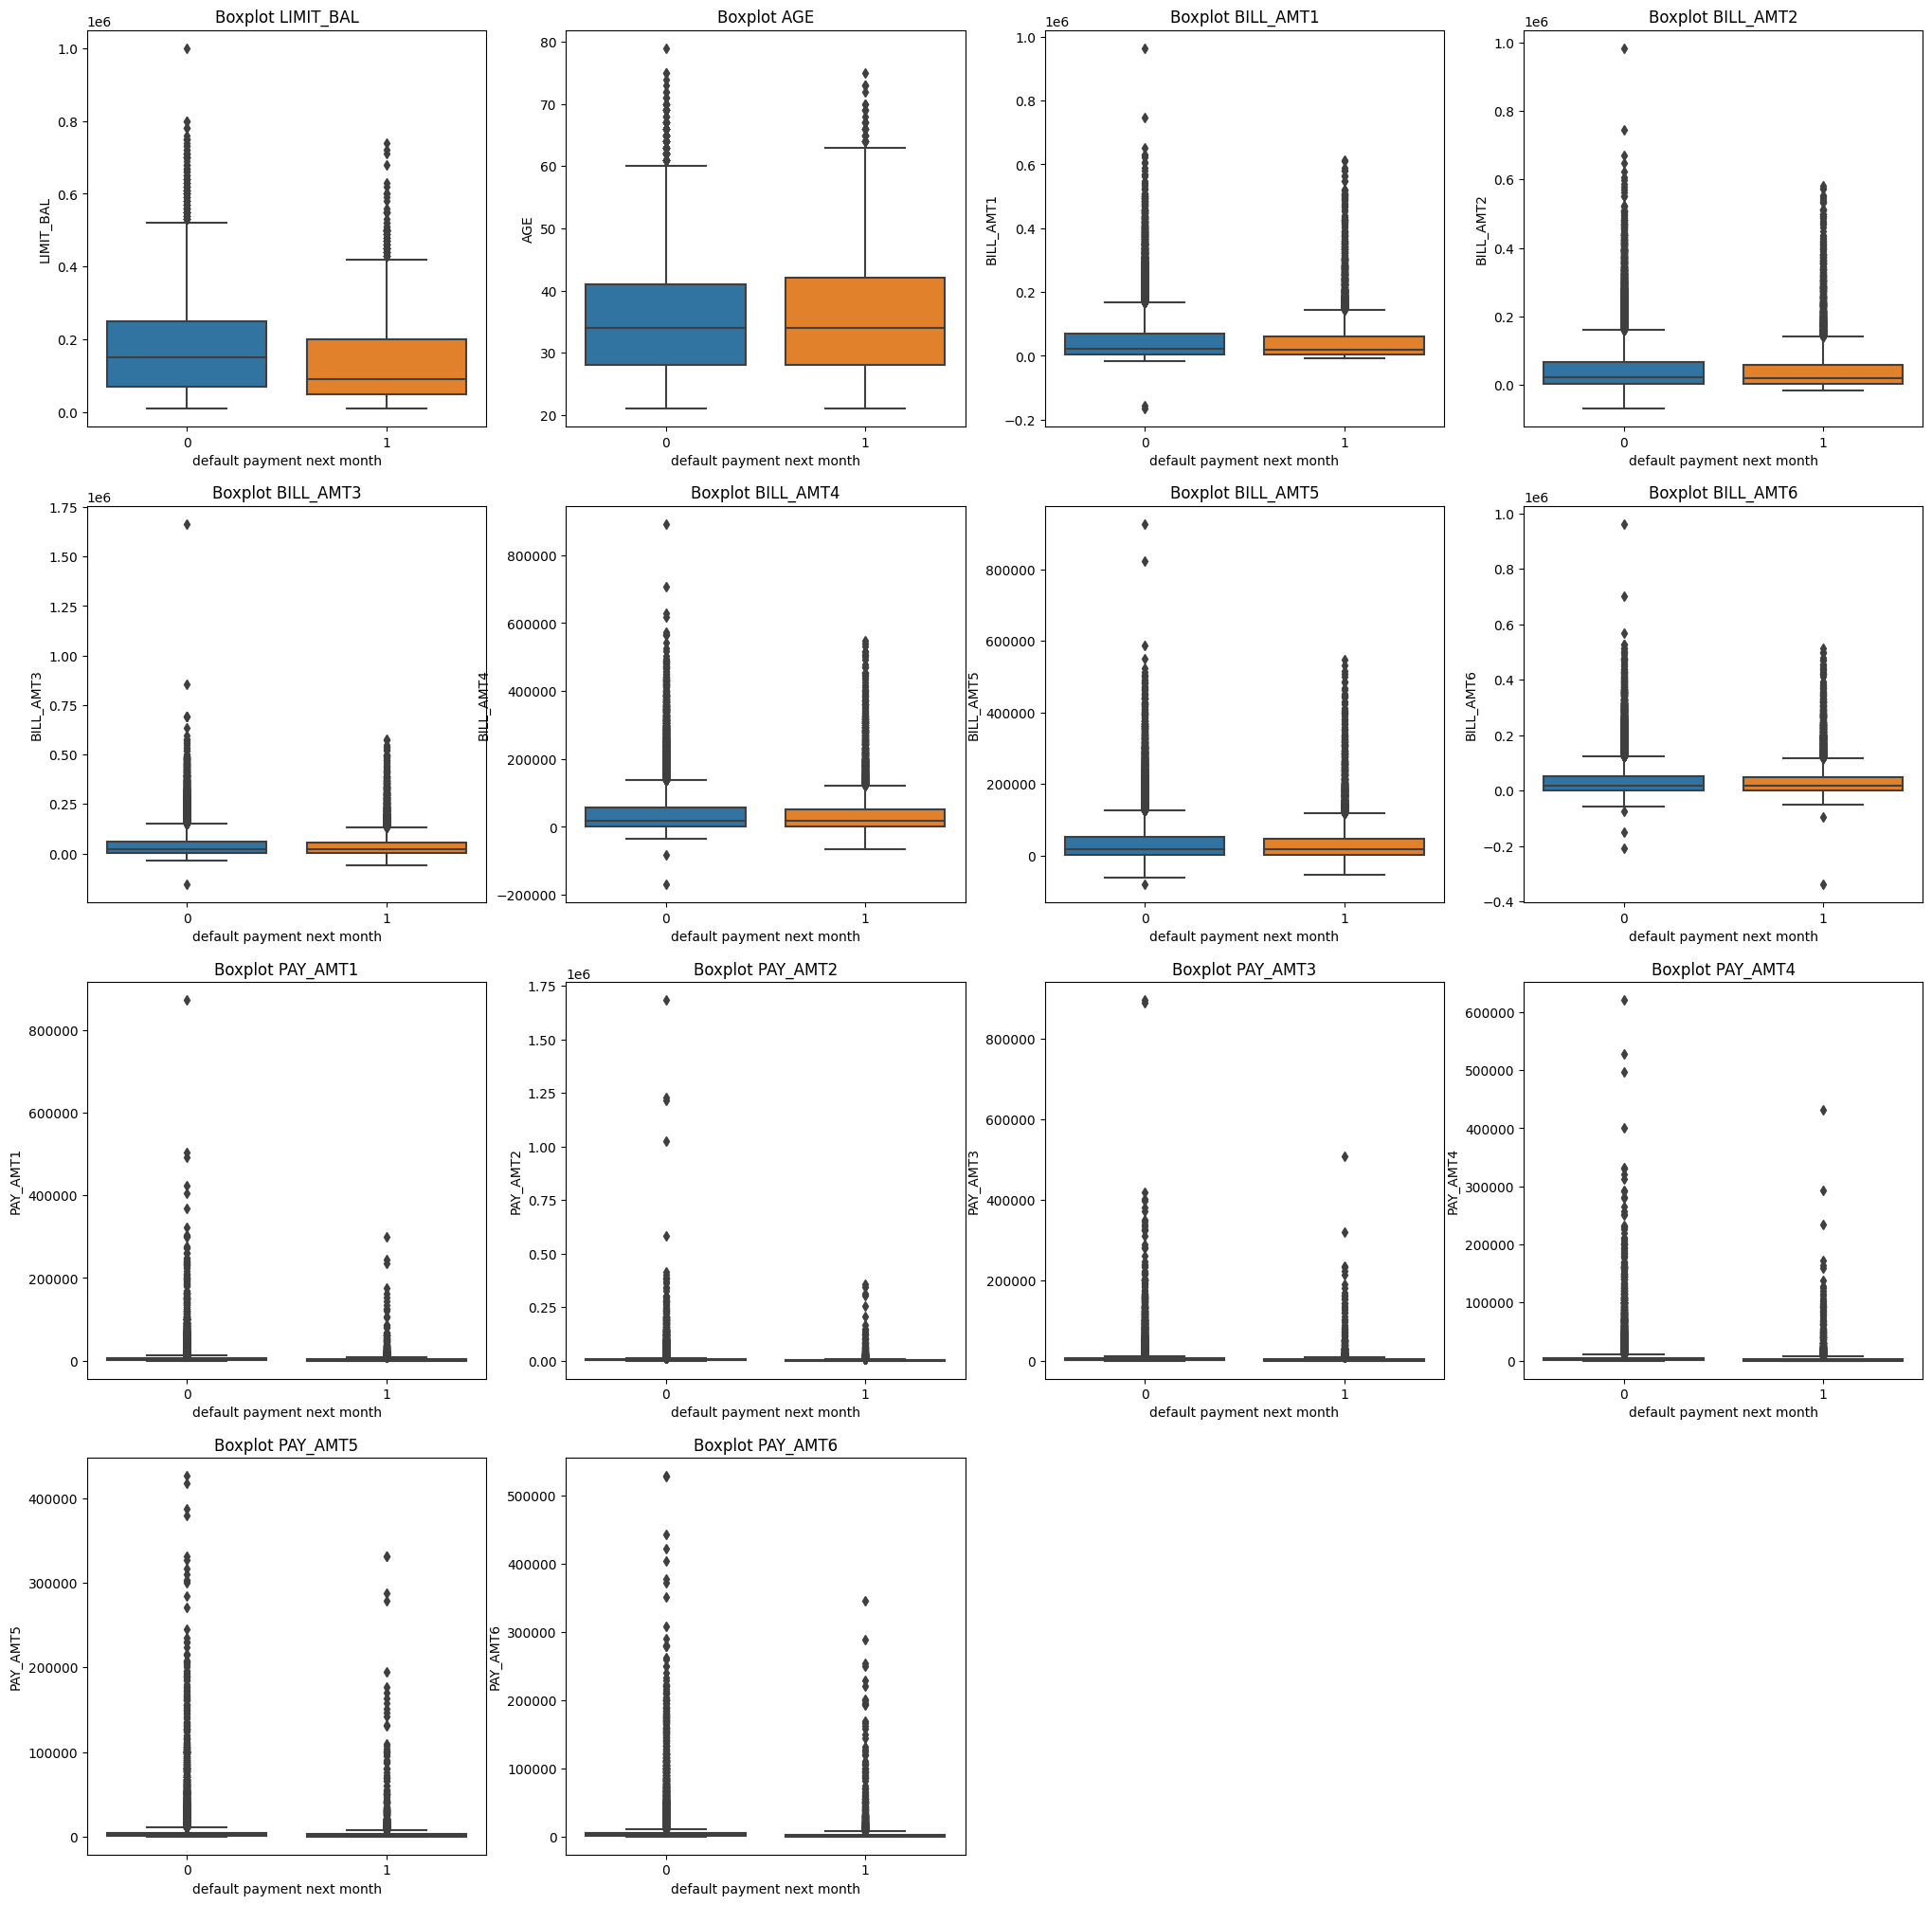

In [206]:
# Visualisasi boxplot untuk kolom numerik
plt.figure(figsize=(25, 25))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df['default payment next month'],y=col, data=df)
    plt.title(f'Boxplot {col}')

📦 Insight Outlier Detection & Distribusi Berdasarkan Target (`default payment next month`)

Objective:
- Mendeteksi outlier pada fitur numerik
- Membandingkan distribusi nilai antara nasabah yang **default (1)** dan yang **tidak default (0)**

---

 🔹 LIMIT_BAL (Limit Kredit)
- Nasabah **yang default (1)** memiliki median limit yang **lebih rendah** dibandingkan yang tidak default.
- Outlier terlihat pada dua kelompok, tapi lebih ekstrem di non-default.
- 🧠 Insight: Limit rendah dapat dikaitkan dengan risiko gagal bayar yang lebih tinggi.

---

 🔹 AGE (Usia)
- Median usia nasabah yang default sedikit **lebih muda** dibanding non-default.
- Sebaran usia relatif mirip, namun beberapa outlier terlihat di usia lebih tua.
- 🧠 Insight: Nasabah muda cenderung memiliki risiko default sedikit lebih tinggi.

---

 🔹 BILL_AMT1–6 (Tagihan per Bulan)
- Kedua kelompok menunjukkan **outlier ekstrem**, terutama di atas Q3.
- Tidak ada perbedaan median yang signifikan, tapi default cenderung memiliki **tagihan sedikit lebih rendah**.
- 🧠 Insight: Meskipun tagihan lebih kecil, beberapa nasabah tetap gagal bayar → indikasi manajemen keuangan buruk.

---

 🔹 PAY_AMT1–6 (Pembayaran per Bulan)
- Kelompok default menunjukkan **nilai pembayaran yang lebih rendah secara konsisten**.
- Banyak nasabah default yang tidak membayar sama sekali (nilai = 0).
- Outlier ekstrem ditemukan di non-default (pembayaran besar).
- 🧠 Insight: Fitur `PAY_AMT` berpotensi kuat untuk membedakan perilaku pembayaran.

---

 📌 Kesimpulan Umum
- Fitur numerik menunjukkan banyak **outlier**, terutama pada fitur keuangan.
- Kelompok yang **gagal bayar** cenderung:
  - Memiliki **limit kredit lebih rendah**
  - **Lebih muda** secara usia
  - **Membayar lebih kecil atau tidak membayar**
- ⚠️ Fitur seperti `LIMIT_BAL`, `AGE`, dan `PAY_AMT` memiliki potensi kuat untuk klasifikasi default

> 💡 Insight for feature engineering: Kita bisa membuat feature baru seperti *"pernah tidak membayar"*, *"total tagihan rata-rata"*, atau *"rasio pembayaran terhadap tagihan"* untuk memperkuat model



## IV.e Heatmap

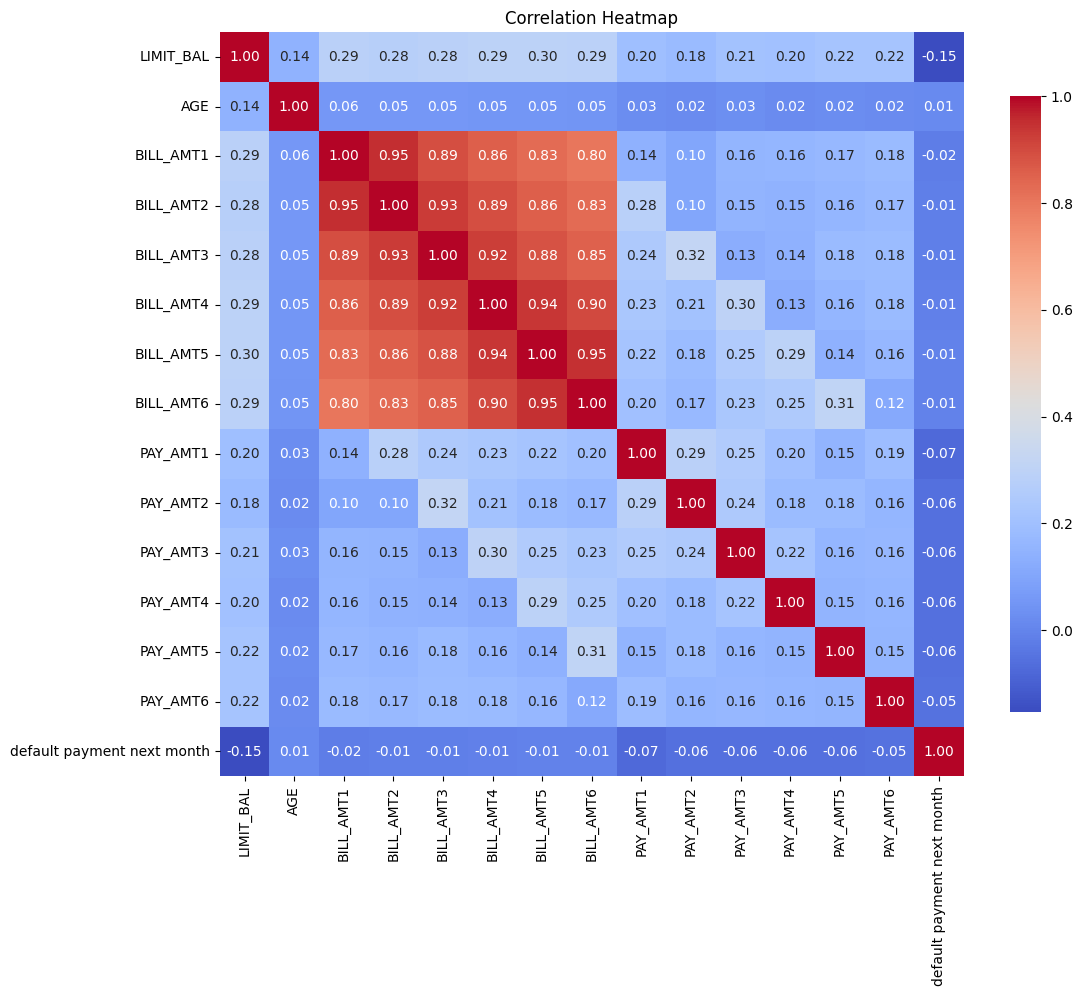

In [207]:
# Visualisasi heatmap
corr_matrix = df[numerical_columns + ['default payment next month']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

🔥 Insight Heatmap Correlation

Objective
- Mengukur hubungan linier antar fitur numerik
- Menilai sejauh mana masing-masing fitur berkorelasi dengan target: `default payment next month`

---

📈 Korelasi Terhadap Target (`default payment next month`)

| Fitur             | Korelasi  | Interpretasi Singkat                                         |
|------------------|-----------|--------------------------------------------------------------|
| LIMIT_BAL        | **-0.15** | Semakin tinggi limit kredit, semakin kecil kemungkinan default |
| PAY_AMT1 – 6     | -0.05 s/d -0.07 | Semakin banyak pembayaran dilakukan, semakin kecil risiko default |
| BILL_AMT1 – 6    | ~ -0.01   | Hampir tidak ada pengaruh linier langsung terhadap default   |
| AGE              | 0.01      | Tidak berkorelasi signifikan dengan default                 |

> 💡 **Catatan:** Semua korelasi ke target berada di bawah |0.2| → tidak ada fitur numerik tunggal yang dominan secara linier dalam menjelaskan default.

---

🔄 Korelasi Antar Fitur
- `BILL_AMT1 – BILL_AMT6` memiliki korelasi **sangat tinggi** satu sama lain (0.80 – 0.95)
- `PAY_AMT1 – PAY_AMT6` juga menunjukkan korelasi menengah hingga tinggi (0.15 – 0.31)
- Ini mengindikasikan adanya **multikolinearitas** antar fitur dalam satu grup

---

🧠 Insight Utama
- Fitur `LIMIT_BAL` adalah prediktor numerik **terkuat secara linier** terhadap default
- Jumlah pembayaran (`PAY_AMT`) memiliki korelasi negatif terhadap default → masuk akal, semakin banyak membayar, makin kecil risiko gagal bayar
- Fitur `AGE` dan `BILL_AMT` tidak memberikan sinyal linier yang kuat terhadap default
- Korelasi antar `BILL_AMT` dan antar `PAY_AMT` sangat tinggi → ada potensi untuk:
  - **Menggabungkan** fitur-fitur ini (misal: `total_bill`, `avg_payment`)
  - **Menghindari multikolinearitas** dengan seleksi fitur

---

🔧 Lanjutan
- **feature engineering** berbasis gabungan dan rasio:
  - `total_pay_amt = sum(PAY_AMT1–6)`
  - `pay_ratio = total_pay_amt / total_bill_amt`
  - `missed_payment_flag = 1 if any PAY_AMT == 0 else 0`
- Bisa gunakan (PCA) jika ingin menghindari redundant features

In [208]:
# Fitur tambahan
# Versi lebih konservatif
df['TOTAL_BILL_AMT'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].abs().sum(axis=1)
df['TOTAL_PAY_AMT'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].abs().sum(axis=1)
df['PAYMENT_RATIO'] = df['TOTAL_PAY_AMT'] / df['TOTAL_BILL_AMT'].replace(0, 1)  # hindari div-by-zero
df['HAS_MISSED_PAYMENT'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].apply(lambda row: 1 if (row == 0).any() else 0, axis=1)
numerical_columns += ['TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'PAYMENT_RATIO', 'HAS_MISSED_PAYMENT']


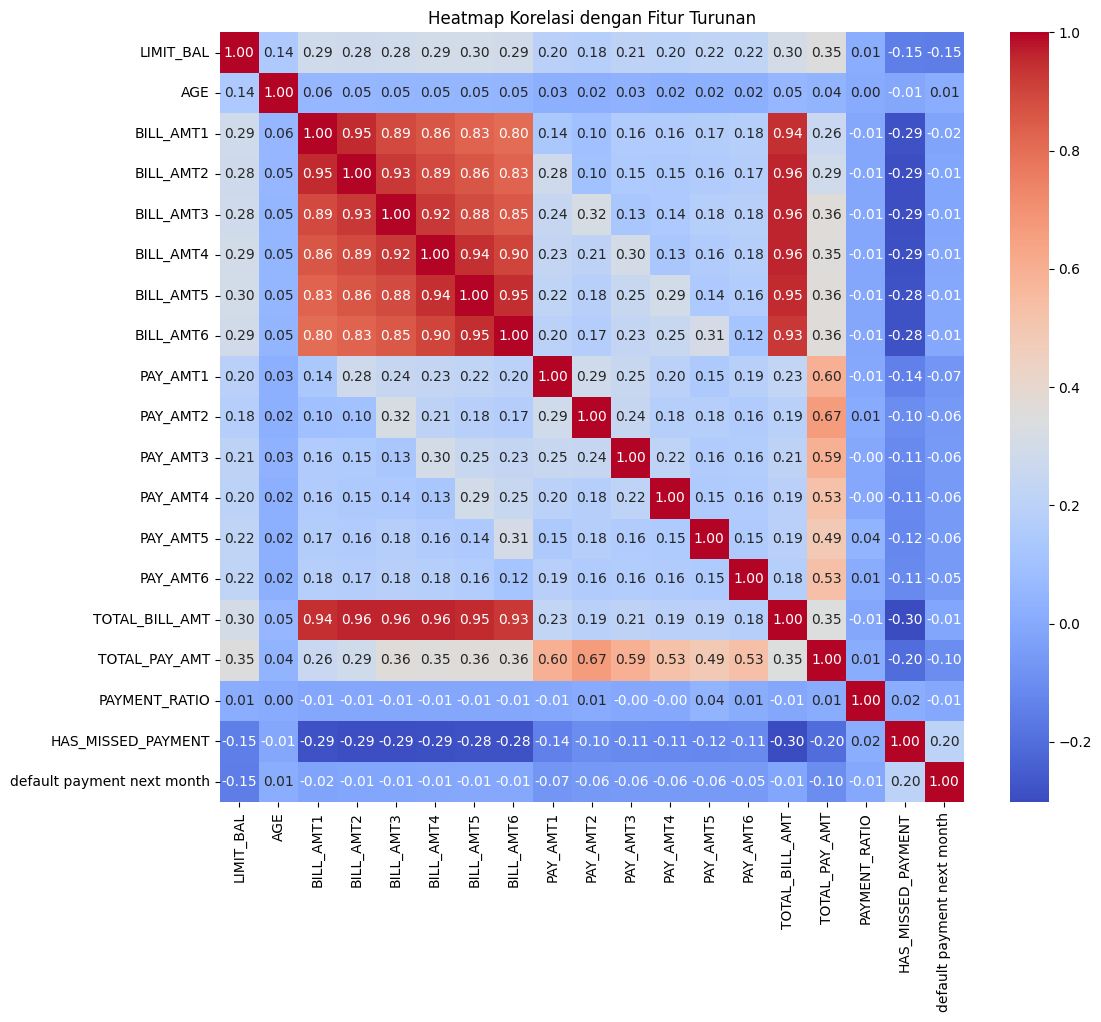

In [209]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns + ['default payment next month']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi dengan Fitur Turunan')
plt.show()


# V.  Feature Engineering 

# VI. Train-Test Split

# VII. Model Selection & Training

# VIII. Model Evaluation

# IX. Hyperparameter Tuning

# Additional

In [210]:
end_time = time.time()
print(f"Total waktu eksekusi semua cell: {end_time - start_time:.2f} detik")

Total waktu eksekusi semua cell: 12.29 detik
